In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kunet2d',
           filter_num=[16, 32, 64, 128, 256, 512],
           stack_num_down=2,
           stack_num_up=2,
           activation='ReLU',
           output_activation='Sigmoid',
           batch_norm=True,
           pool=True,
           unpool=False,
           weights='imagenet',
           optimizer=None, # default is optimizers.Adam(learning_rate=1e-3)
           loss=None, # default is losses.binary_crossentropy
           metric=None # default is Util.dice_coef           
          )

*** GP2  KUNet2D ***
Working directory: /tmp/tmpqdc7aaq7GP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final.npy')

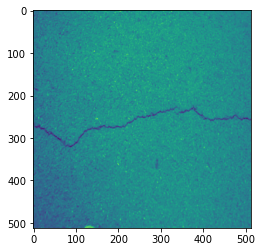

In [5]:
imshow(images[0])

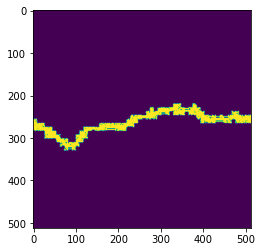

In [6]:
imshow(masks[0])

In [7]:
images = images[:6000]

In [8]:
masks = masks[:6000]

In [9]:
images.shape

(6000, 512, 512, 1)

In [10]:
masks.shape

(6000, 512, 512, 1)

In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [ ]:
R.run(images=images, masks=masks, weights=weights, runs=5)

Weights OK!
******
Loop 0
Epoch 1/100
5/5 [==============================] - 26s 3s/step - loss: 0.6886 - dice_coeff: 0.0957 - val_loss: 0.6880 - val_dice_coeff: 0.1178
Epoch 2/100
5/5 [==============================] - 6s 1s/step - loss: 0.5343 - dice_coeff: 0.1030 - val_loss: 5.2676 - val_dice_coeff: 0.1252
Epoch 3/100
5/5 [==============================] - 6s 1s/step - loss: 0.4674 - dice_coeff: 0.1056 - val_loss: 13.3620 - val_dice_coeff: 0.1258
Epoch 4/100
5/5 [==============================] - 6s 1s/step - loss: 0.4286 - dice_coeff: 0.1076 - val_loss: 12.9685 - val_dice_coeff: 0.1258
Epoch 5/100
5/5 [==============================] - 6s 1s/step - loss: 0.4104 - dice_coeff: 0.1079 - val_loss: 13.7224 - val_dice_coeff: 0.1259
Epoch 6/100
5/5 [==============================] - 6s 1s/step - loss: 0.3892 - dice_coeff: 0.1078 - val_loss: 13.8117 - val_dice_coeff: 0.1260
Epoch 7/100
5/5 [==============================] - 6s 1s/step - loss: 0.3713 - dice_coeff: 0.1064 - val_loss: 13.9447

6/6 [==============================] - 7s 1s/step - loss: 0.1226 - dice_coeff: 0.3583 - val_loss: 0.2378 - val_dice_coeff: 0.1008
Epoch 9/100
6/6 [==============================] - 7s 1s/step - loss: 0.1181 - dice_coeff: 0.3740 - val_loss: 0.2333 - val_dice_coeff: 0.1093


In [ ]:
R.classifier_scores

In [ ]:
R.discriminator_scores

In [ ]:
R.plot()

In [21]:
R.discriminator.metrics

['accuracy']

In [25]:
R.classifier.metric

In [13]:
R.classifier_scores

[[0.9701180458068848, 0.13511507213115692],
 [0.2963081896305084, 0.10931046307086945],
 [0.2716491222381592, 0.2411702424287796],
 [0.24634042382240295, 0.3750593960285187],
 [0.24083058536052704, 0.44539132714271545]]

In [14]:
R.discriminator_scores

[[0.07617288082838058, 0.9972222447395325],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0]]

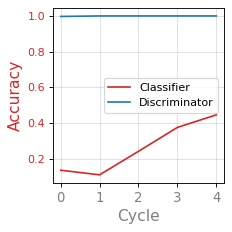

In [16]:
R.plot()

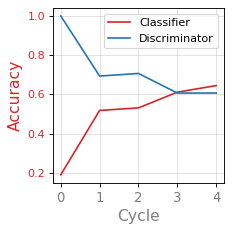

In [18]:
R.plot()

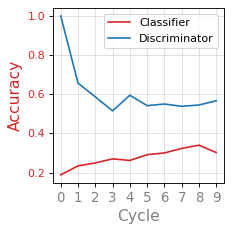

In [18]:
R.plot()

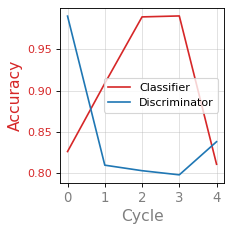

In [17]:
R.plot()